In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import descartes
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [38]:
df = pd.read_csv('dataset/crime.csv')
crs = {'init':'epsg:4326'}
df['counter'] = 1
lb_make = LabelEncoder()
#df["HUNDRED_BLOCK"] = df["HUNDRED_BLOCK"].str.replace(r"[^a-zA-Z ]+", " ").str.strip()
df['NEIGHBOURHOOD_CODE'] = lb_make.fit_transform(df['NEIGHBOURHOOD'].astype(str))

In [39]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,counter,NEIGHBOURHOOD_CODE
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19


# What are the various types of crime

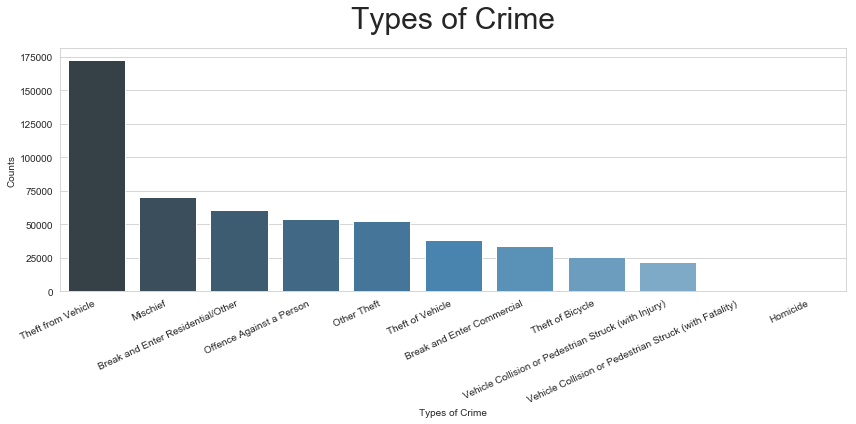

In [40]:
plt.figure(figsize=(12,6))
plt.title('Types of Crime',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='TYPE',data=df,palette='Blues_d', order = df['TYPE'].value_counts().index)
ax.set(xlabel='Types of Crime')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

# Trends over the years of the crime in Vancouver

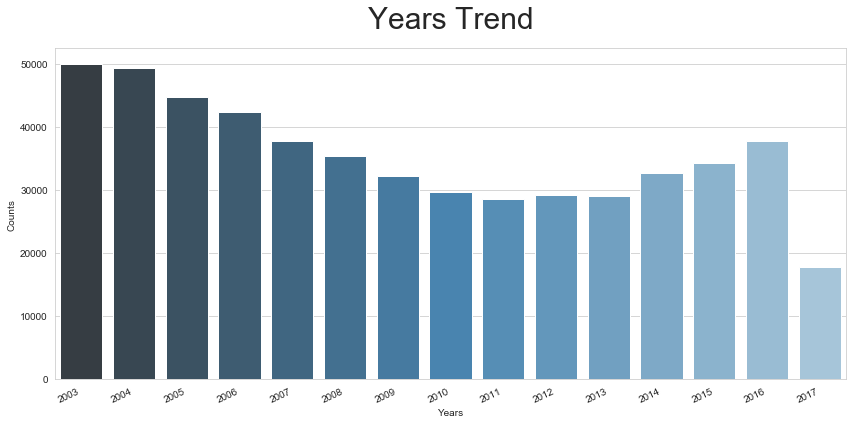

In [41]:
plt.figure(figsize=(12,6))
plt.title('Years Trend',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='YEAR',data=df,palette='Blues_d')
ax.set(xlabel='Years', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

In [47]:
vancouver_map = gpd.read_file('dataset/local_area_boundary.shp')

vancouver_map_1 = gpd.read_file('dataset/lanes.shp')

vancouver_map_2 = gpd.read_file('dataset/local_area_boundary.shp')

vancouver_map_3 = gpd.read_file('dataset/street_intersections.shp')

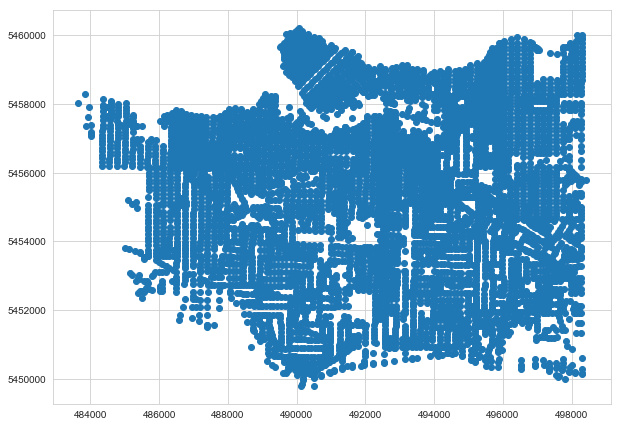

In [48]:
fig,ax = plt.subplots(figsize=(10,11))
vancouver_map_3.plot(ax = ax)

In [8]:
geometry  = [Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]

In [9]:
geo_df = gpd.GeoDataFrame(df,crs= crs,geometry = geometry)
geo_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,counter,NEIGHBOURHOOD_CODE,geometry
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19,POINT (-123.0837633 49.26980201)
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19,POINT (-123.0837633 49.26980201)
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19,POINT (-123.0837633 49.26980201)
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19,POINT (-123.0837633 49.26980201)
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19,POINT (-123.0837633 49.26980201)


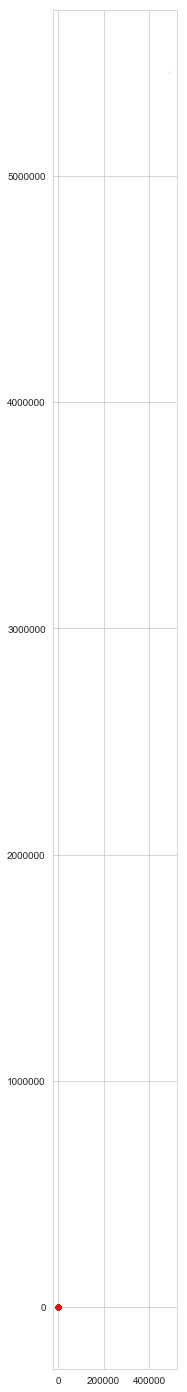

In [15]:
fig,ax = plt.subplots(figsize=(25,25))
vancouver_map.plot(ax = ax,color='grey',alpha=0.4)
geo_df[geo_df['NEIGHBOURHOOD_CODE'] == 19].plot(ax=ax, markersize = 20,color='red',marker ='o',label='Map')
#plt.legend(prop={'size':15})
plt.show()

In [11]:
geo_df.dtypes

TYPE                   object
YEAR                    int64
MONTH                   int64
DAY                     int64
HOUR                  float64
MINUTE                float64
HUNDRED_BLOCK          object
NEIGHBOURHOOD          object
X                     float64
Y                     float64
Latitude              float64
Longitude             float64
counter                 int64
NEIGHBOURHOOD_CODE      int32
geometry               object
dtype: object

In [12]:
type(geo_df.loc[0,'geometry'])

shapely.geometry.point.Point

# Trends over the years of the crime in Vancouver

In [13]:
df.groupby(['NEIGHBOURHOOD']).count()['counter'].sort_values(ascending=True).head(5)

NEIGHBOURHOOD
Musqueam            532
Stanley Park       3775
South Cambie       5212
Shaughnessy        5426
West Point Grey    5871
Name: counter, dtype: int64